In [1]:
import numpy as np
import matplotlib.pyplot as plt

Входные параметры - количество реализаций в выборке N и $\theta$ - параметр распределения (согласно заданию, распределение равномерное от 0 до $\theta$). sample - выборкаю

In [2]:
N = 10**4
theta = 5

sample = theta*np.random.rand(N)

Определяем функции оценок. Каждая принимает на вход n - размер выборки, для которого нужно считать оценкую

In [3]:
def est0(n, row=sample):
    return 2*sum(row[:n])/float(n)


def est1(n, row=sample):
    return est0(n, row)*0.5 + np.max(row[:n])*0.5


def est2(n, row=sample):
    return (n+1)*np.min(row[:n])


def est3(n, row=sample):
    return np.min(row[:n]) + np.max(row[:n])


def est4(n, row=sample):
    return (n+1)/float(n)*np.max(row[:n])

est_functions = [est0, est1, est2, est3, est4]

Считаем модули разности оценок и $\theta$ для каждого значения $n\leq N$. 

In [4]:
est_rows = [[],[],[],[],[]]
for n in range(N+1)[1:]:
    for i in range(5):
        est_rows[i].append(np.abs(est_functions[i](n) - theta))

Строим графики.

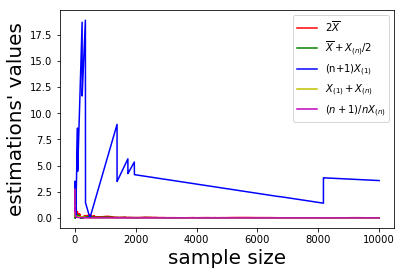

In [5]:
est_colors = ['r', 'g', 'b', 'y', 'm']
est_labels = ['2$\overline{X}$', '$\overline{X} + {X_{(n)}}/{2}$', '(n+1)$X_{(1)}$', '$X_{(1)} + X_{(n)}$', '${(n+1)}/{n}X_{(n)}$']

def plot_rows(limits=None, rows=est_rows):
    for i in range(len(rows)):
        plt.plot(range(N+1)[1:], rows[i], color=est_colors[i], label=est_labels[i])
        plt.legend()
    if limits:
        plt.axis(limits)
    plt.xlabel("sample size", fontsize=20)
    plt.ylabel("estimations' values", fontsize=20)
    plt.show()
    
plot_rows()

Из графика видно, что оценка $(n+1)X_{(1)}$ сильно отличается от $\theta$. Будем строить графики без нее. Для остальных оценок строю три графика - для значений n от 0 до 100, от N/2 до N/2+100 и от N-100 до N соответственно.

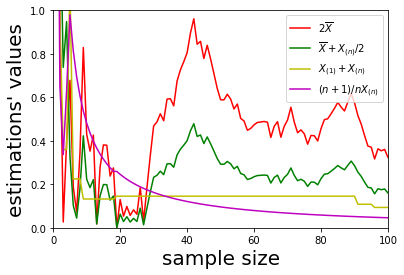

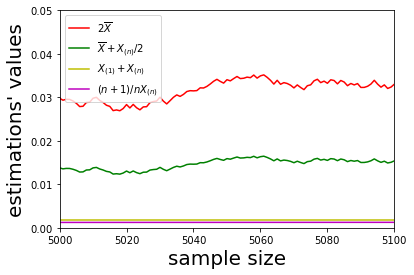

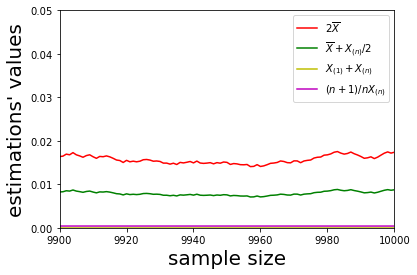

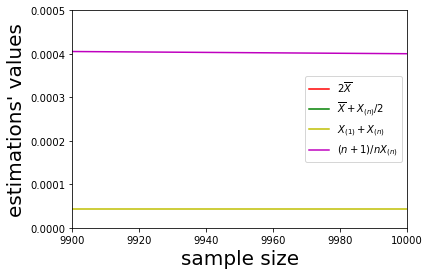

In [8]:
if len(est_rows) == 5:
    del est_rows[2]
    del est_colors[2]
    del est_labels[2]
    del est_functions[2]
plot_rows([0, 100, 0.0, 0.2*theta])
plot_rows([N/2, N/2 + 100, 0.0, 0.01*theta])
plot_rows([N - 100, N, 0.0, 0.01*theta])
plot_rows([N - 100, N, 0.0, 0.0001*theta])

Проверим оценки (кроме 2ой) для разных значений $\theta$

In [11]:
def deal_with_theta(new_theta):
    new_sample = new_theta*np.random.rand(N)
    new_rows = [[],[],[],[]]
    for n in range(N+1)[1:]:
        for i in range(4):
            new_rows[i].append(np.abs(est_functions[i](n, new_sample) - new_theta))
    plot_rows([0, 100, 0.0, 0.2*theta])
    plot_rows([N/2, N/2 + 100, 0.0, 0.01*theta])
    plot_rows([N - 100, N, 0.0, 0.01*theta])
    plot_rows([N - 100, N, 0.0, 0.0001*theta])

$\theta = 1$

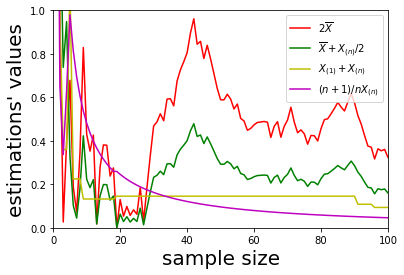

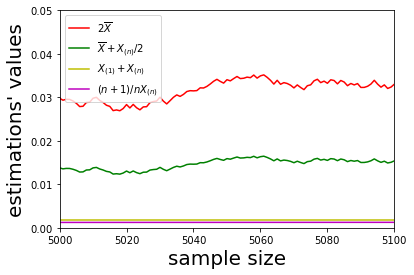

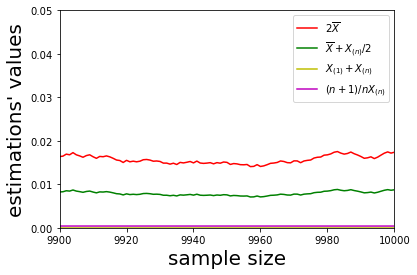

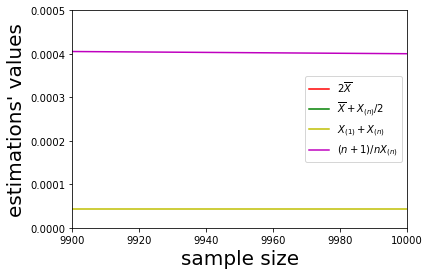

In [12]:
deal_with_theta(1)

$\theta = 10$

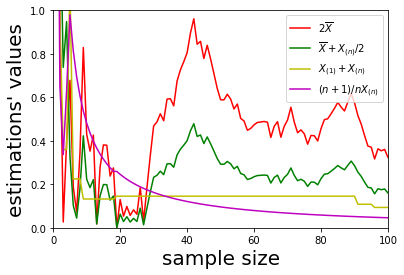

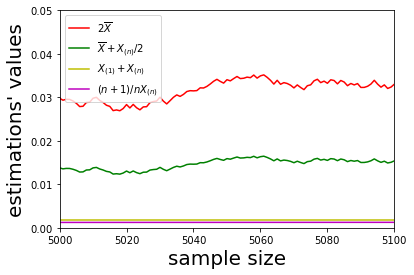

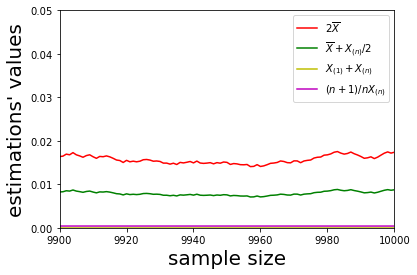

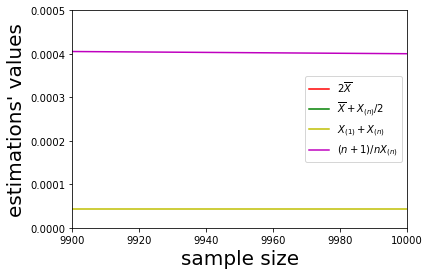

In [13]:
deal_with_theta(10)

$\theta = 100$

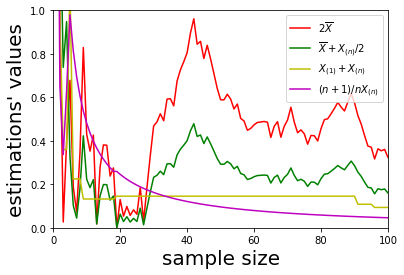

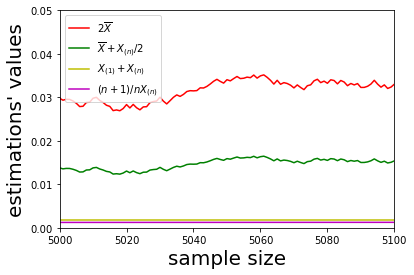

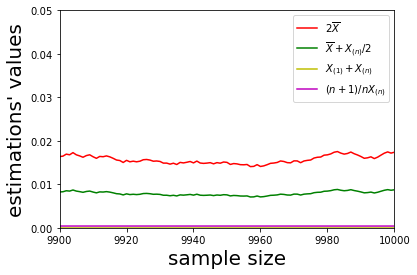

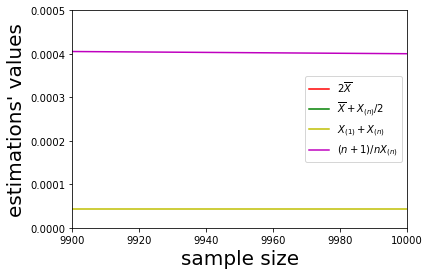

In [14]:
deal_with_theta(100)

$\theta = 1000$

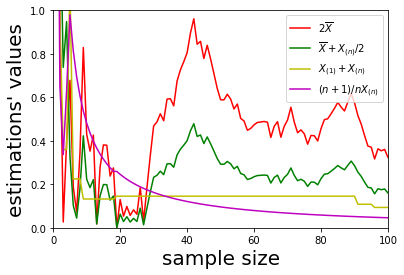

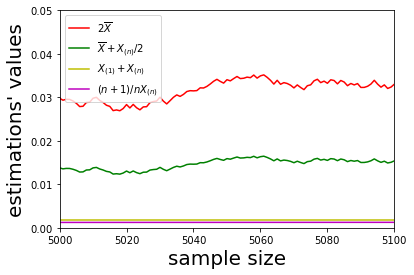

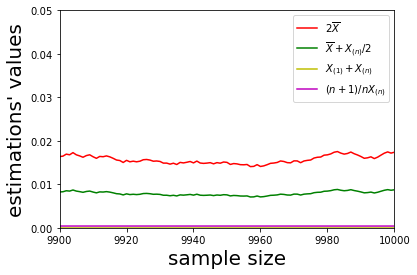

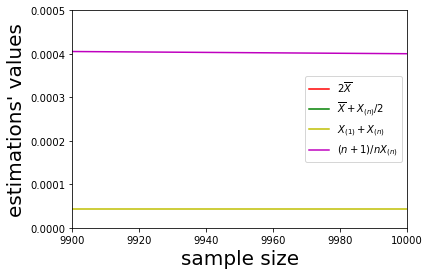

In [15]:
deal_with_theta(1000)